### import

In [66]:
import googlemaps
import pandas as pd
from tqdm.notebook import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import re


### 주소 리스트를 입력했을 때 구로 value_count해서 데이터프레임을 반환하는 함수

In [67]:
def get_address(list) :
    list_gu = []
    for address in tqdm(list) :
        gu_match = re.findall('[가-힣]+구', address)
        if gu_match:
            list_gu.append(gu_match[0])
        else:
            list_gu.append(None) 
            
    

    df = pd.DataFrame({'구' : list_gu}).value_counts('구')
    return df

### 구별 지하철역 수

  0%|          | 0/269 [00:00<?, ?it/s]

<Axes: title={'center': '구별 지하철 수'}, xlabel='구'>

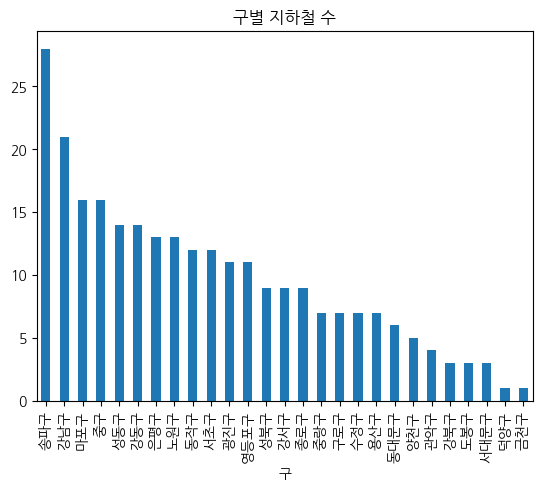

In [68]:
subway = pd.read_csv('../data/eda_project/01_subway_yhj.csv', encoding='euc-kr')
subway = subway[subway['도로명주소'].str.contains('동')]
sub_ad = subway['도로명주소'].values
sub_gu = get_address(sub_ad)
sub_gu.plot.bar(title = '구별 지하철 수')

### 구별 문화시설 수

In [69]:
culture = pd.read_csv('../data/eda_project/02_culture_yhj.csv', encoding='euc-kr').fillna('없음')
culture = culture[culture['주소'].str.contains('동')]
cul_ad = culture['주소'].values
cul_gu = get_address(cul_ad)
cul_gu

  0%|          | 0/422 [00:00<?, ?it/s]

구
종로구     192
강남구      32
중구       26
마포구      24
강동구      17
동작구      16
성동구      16
광진구      12
동대문구     11
양천구       8
송파구       8
서대문구      8
용산구       7
서초구       7
구로구       6
노원구       6
도봉구       6
영등포구      6
성북구       4
강북구       3
관악구       2
금천구       2
강서구       1
은평구       1
중랑구       1
Name: count, dtype: int64

### 구별 대형마트, 백화점, 전문점, 쇼핑센터, 복합쇼핑 수

In [70]:
shop = pd.read_csv('../data/eda_project/03_shop_yhj.csv', encoding='utf-8')
shop = shop.drop('동별(1)', axis=1)
shop = shop.loc[3:]
shop.columns = ['구', '대형마트', '백화점', '전문점', '쇼핑센터', '복합쇼핑']
shop = shop.replace({'-' : 0})
shop[['대형마트', '백화점', '전문점', '쇼핑센터', '복합쇼핑']] = shop[['대형마트', '백화점', '전문점', '쇼핑센터', '복합쇼핑']].astype(int)


### 구별 대형 병원(종합병원, 대학병원) 수

In [71]:
hospitol = pd.read_csv('../data/eda_project/04_hospital_yhj.csv', encoding='utf-8')
hospitol = hospitol.loc[4:]
hospitol = hospitol.drop(['자치구별(1)'], axis=1)
hospitol = hospitol.drop(['2022.1'], axis=1)
hospitol = hospitol.drop(['2022.3'], axis=1)
hospitol['2022.2'] = hospitol['2022.2'].replace('-', 0).astype(int)
hospitol['2022'] = hospitol['2022'].replace('-', 0).astype(int)
hospitol['대형병원 수'] = hospitol['2022'] + hospitol['2022.2']
hospitol = hospitol.drop(['2022'], axis=1)
hospitol = hospitol.drop(['2022.2'], axis=1)

hospitol = hospitol.rename(columns={'자치구별(2)' : '구'})

### 구별 시가화면적 비율

### 시가화면적 : 용도지역 중 주거지역, 상업지역 및 공업지역 면적의 합

In [72]:
ground = pd.read_excel('../data/eda_project/05_ground_yhj.xlsx')
ground = pd.DataFrame({
    '구' : ground['자치구별(2)'],
    '시가화면적비율' : ground['2019']
})
ground

/home/hj/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,구,시가화면적비율
0,종로구,53.39
1,중구,99.89
2,용산구,61.14
3,성동구,73.98
4,광진구,69.16
5,동대문구,97.52
6,중랑구,60.44
7,성북구,74.17
8,강북구,47.67
9,도봉구,47.61


### 구별 n인 세대 수 

In [73]:
fam = pd.read_excel('../data/eda_project/06_fam_yhj.xlsx')
fam_col = fam.loc[0].values
fam = fam.loc[1:]
fam = fam.astype({'2022' : int, '2022.1' : int, '2022.2' : int, 
                  '2022.3' : int, '2022.4' : int, '2022.5' : int, '2022.10' : int,
                  '2022.6' : int, '2022.7' : int, '2022.8' : int, '2022.9' : int})
fam['5인 이상 세대'] = fam['2022.5']+fam['2022.6']+fam['2022.7']+fam['2022.8']+fam['2022.9'] + fam['2022.10']
fam_col = ['동별(1)', '2022', '2022.1', '2022.2', '2022.3', '2022.4', '5인 이상 세대']
fam = fam[fam_col]
fam
fam = fam.rename(columns={'동별(1)' : '구',  '2022': '세대 수',
            '2022.1' : '1인 세대 수', '2022.2' : '2인 세대 수',
            '2022.3' : '3인 세대 수', '2022.4' : '4인 세대 수',})
fam


/home/hj/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,구,세대 수,1인 세대 수,2인 세대 수,3인 세대 수,4인 세대 수,5인 이상 세대
1,종로구,72524,37680,14450,10269,7570,2555
2,중구,63139,32954,13867,8673,5782,1863
3,용산구,109805,54005,23836,16454,11744,3766
4,성동구,133305,58154,30174,23400,17060,4517
5,광진구,169291,83646,35216,25306,19866,5257
6,동대문구,169873,84547,35506,25446,18777,5597
7,중랑구,187413,83492,45637,30591,21598,6095
8,성북구,197082,82026,44110,34810,28171,7965
9,강북구,144313,65435,35336,23047,15842,4653
10,도봉구,138356,49922,36182,26914,19708,5630


### yjs_merge : 구별 거래금액(만원), 초등학교수, 자가율(%)
### mw : 구별 근무지 기준 1인당 평균 연봉
### mh : 구별 주거지 기준 1인당 평균 연봉
### gw : 구별 총종사자수

In [74]:
yjs_merge = pd.read_csv('../data/eda_project/yjs_merge.csv', encoding='utf-8')
mw = pd.read_csv("../data/eda_project/seoul_money(work).csv",encoding='euc-kr')
mh = pd.read_csv("../data/eda_project/seoul_mony(home).csv",encoding='euc-kr')
gw = pd.read_csv('../data/eda_project/seoul_gu_work.csv', encoding='utf-8')

In [75]:
yjs_merge

,구,거래금액(만원),초등학교수,합계,자가,자가율(%)
0,강남구,207144.448980,33,208833,76399,36.583777
1,강동구,93626.194037,29,177148,75712,42.739404
2,강북구,66786.311230,14,129805,61818,47.623743
3,강서구,79163.403564,35,244097,100998,41.376174
4,관악구,72948.668005,22,248959,78971,31.720484
5,광진구,119721.447721,22,152090,55756,36.659872
6,구로구,62036.694633,26,164083,83154,50.678011
7,금천구,59569.069767,18,103432,43049,41.620582
8,노원구,67273.907743,42,202695,104051,51.333777
9,도봉구,58481.827441,23,127362,74507,58.500181


### 구별 학생1만명당 사설학원수, 초·중·고 학생수, 사설학원수

/home/hj/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



<Axes: title={'center': '구별 학원 수'}, xlabel='구'>

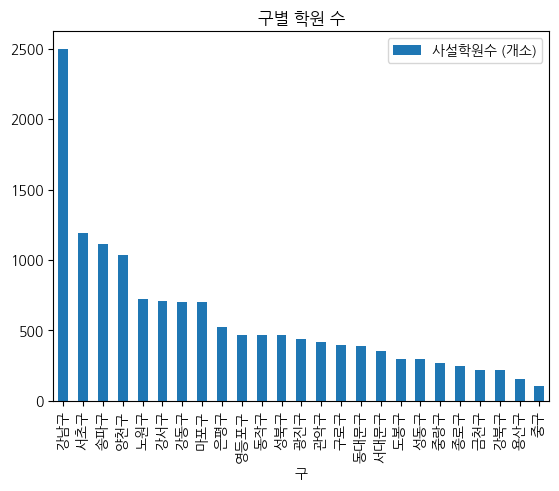

In [140]:
ei_fin = pd.read_excel('../data/eda_project/07_ei_yhj.xlsx')

ei_fin = ei_fin[1:]
ei_fin = ei_fin.drop(['자치구별(1)'], axis=1)
ei_fin = ei_fin.rename(columns={'2022' : '초·중·고 학생수 (명)',  '2022.1': '사설학원수 (개소)',
            '2022.2' : '학생1만명당 사설학원수 (개소)'})
ei_fin['초·중·고 학생수 (명)'] = ei_fin['초·중·고 학생수 (명)'].astype(int)
ei_fin['사설학원수 (개소)'] = ei_fin['사설학원수 (개소)'].astype(int)
ei_fin['학생1만명당 사설학원수 (개소)'] = ei_fin['학생1만명당 사설학원수 (개소)'].astype(float)
ei_fin_plot = ei_fin[['자치구별(2)', '사설학원수 (개소)']].sort_values(by='사설학원수 (개소)',  ascending=False)
ei_fin_plot.rename(columns={'자치구별(2)' : '구'}, inplace=True)
ei_fin_plot.plot.bar(x='구', title = '구별 학원 수')

,구,사설학원수 (개소)
23,강남구,2500
22,서초구,1193
24,송파구,1110
15,양천구,1038
11,노원구,726
16,강서구,708
25,강동구,703
14,마포구,699
12,은평구,525
19,영등포구,470


In [77]:
mw = mw.drop(['인원 (명)'], axis=1)
mw = mw.drop(['금액 (백만원)'], axis=1)
mh = mh.drop(['인원 (명)'], axis=1)
mh = mh.drop(['금액 (백만원)'], axis=1)
yjs_merge = yjs_merge.drop(['합계'], axis=1)
yjs_merge = yjs_merge.drop(['자가'], axis=1)

### 구별 인구 및 인구밀도

In [78]:
pop = pd.read_csv('../data/eda_project/08_pop_yhj.csv', encoding='utf-8')
pop = pop.drop(['동별(1)'], axis=1)
pop = pop.rename(columns={'동별(2)' : '구',  '2022': '인구 (명)',
            '2022.1' : '면적 (㎢)', '2022.2' : '인구밀도 (명/㎢)'})
pop = pop.loc[1:].sort_values(by='구')
pop_bar = pop.set_index(['구'], drop=True)['인구 (명)']


<Axes: title={'center': '구별 인구수'}, xlabel='구'>

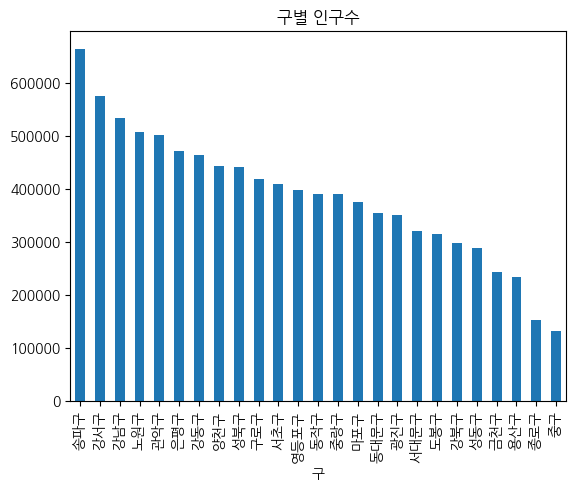

In [79]:
pop_bar.astype(int).sort_values(ascending=False).plot.bar(title = '구별 인구수')


### 앞의 데이터프레임들을 merge를 통해 종합

In [80]:
pop = pop.merge(yjs_merge, left_on='구', right_on='구')
pop = pop.merge(mh, left_on='구', right_on='구').rename(columns={'1인당금액(백만원)' : '1인당금액(백만원)_집'})
pop = pop.merge(mw, left_on='구', right_on='구').rename(columns={'1인당금액(백만원)' : '1인당금액(백만원)_직장'})
pop = pop.merge(gw, left_on='구', right_on='구')
pop = pop.merge(ei_fin, left_on='구', right_on='자치구별(2)')
pop = pop.merge(sub_gu, left_on='구', right_on='구').rename(columns={'count' : '지하철 수'})
pop = pop.merge(cul_gu, left_on='구', right_on='구').rename(columns={'count' : '문화시설 수'})
pop = pop.merge(shop, left_on='구', right_on='구')
pop = pop.merge(hospitol, left_on='구', right_on='구')
pop = pop.merge(ground, left_on='구', right_on='구')
pop = pop.merge(fam, left_on='구', right_on='구')

pop.set_index('구', drop=True, inplace=True)

In [81]:
pop.columns

Index(['인구 (명)', '면적 (㎢)', '인구밀도 (명/㎢)', '거래금액(만원)', '초등학교수', '자가율(%)',
       '1인당금액(백만원)_집', '1인당금액(백만원)_직장', '총종사자수', '자치구별(2)', '초·중·고 학생수 (명)',
       '사설학원수 (개소)', '학생1만명당 사설학원수 (개소)', '지하철 수', '문화시설 수', '대형마트', '백화점',
       '전문점', '쇼핑센터', '복합쇼핑', '대형병원 수', '시가화면적비율', '세대 수', '1인 세대 수',
       '2인 세대 수', '3인 세대 수', '4인 세대 수', '5인 이상 세대'],
      dtype='object')

In [82]:
pop = pop[['거래금액(만원)', '인구 (명)', '면적 (㎢)', '인구밀도 (명/㎢)','자가율(%)','1인당금액(백만원)_집', '1인당금액(백만원)_직장', '총종사자수', 
           '세대 수', '1인 세대 수', '2인 세대 수', '3인 세대 수','4인 세대 수', '5인 이상 세대','대형마트', '백화점', '전문점', '쇼핑센터', '복합쇼핑', 
          '초등학교수','초·중·고 학생수 (명)',
       '사설학원수 (개소)', '학생1만명당 사설학원수 (개소)', '지하철 수', '문화시설 수', '대형병원 수','시가화면적비율']]

In [83]:
pop['인구 (명)'] = pop['인구 (명)'].astype(int)
pop['면적 (㎢)'] = pop['면적 (㎢)'].astype(float)
pop['인구밀도 (명/㎢)'] = pop['인구밀도 (명/㎢)'].astype(int)
pop['대형병원 수'] = pop['대형병원 수'].astype(int)
pop.to_csv('../data/eda_project/09_apart_price_yhj.csv')

In [84]:
pop

,거래금액(만원),인구 (명),면적 (㎢),인구밀도 (명/㎢),자가율(%),1인당금액(백만원)_집,1인당금액(백만원)_직장,총종사자수,세대 수,1인 세대 수,...,쇼핑센터,복합쇼핑,초등학교수,초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),지하철 수,문화시설 수,대형병원 수,시가화면적비율
구,,,,,,,,,,,,,,,,,,,,,
강남구,207144.448980,534103,39.50,13522,36.583777,81.053206,47.918872,801419,232777,94198,...,3,1,33,59643,2500,419.2,21,32,9,66.26
강동구,93626.194037,464037,24.59,18871,42.739404,44.191868,41.359432,157465,202169,75420,...,0,0,29,43539,703,161.5,14,17,6,55.49
강북구,66786.311230,297702,23.60,12614,47.623743,31.041123,28.110932,80222,144313,65435,...,2,0,14,19829,217,109.4,3,3,1,47.67
강서구,79163.403564,574638,41.45,13862,41.376174,39.478474,40.587155,290473,273697,122745,...,1,0,35,48496,708,146.0,9,1,6,45.76
관악구,72948.668005,501226,29.57,16951,31.720484,33.653264,33.458269,128417,283623,174511,...,1,3,22,28082,415,147.8,4,2,4,53.16
광진구,119721.447721,351252,17.06,20586,36.659872,40.772493,32.672721,129707,169291,83646,...,0,0,22,27738,441,159.0,11,12,2,69.16
구로구,62036.694633,418418,20.12,20794,50.678011,37.383095,35.585078,240689,183655,76076,...,1,0,26,33763,397,117.6,7,6,4,74.45
금천구,59569.069767,242818,13.02,18649,41.620582,32.511710,34.728632,255449,119583,61035,...,7,0,18,15492,219,141.4,1,2,1,77.70
노원구,67273.907743,508014,35.44,14335,51.333777,40.073375,30.045920,133398,217540,76674,...,1,0,42,56318,726,128.9,13,6,3,41.11


### 각 column의 최댓값을 기준으로 정규화

In [85]:
pop_col = pop.columns
pop_reg = pd.DataFrame(index=pop.index)

for col in pop_col :
    pop_to = round(pop[col]/pop[col].max(),2)
    pop_reg = pd.concat([pop_reg,pop_to], axis=1)
pop_reg.columns = pop_col 
pop_reg.head()

,거래금액(만원),인구 (명),면적 (㎢),인구밀도 (명/㎢),자가율(%),1인당금액(백만원)_집,1인당금액(백만원)_직장,총종사자수,세대 수,1인 세대 수,...,쇼핑센터,복합쇼핑,초등학교수,초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),지하철 수,문화시설 수,대형병원 수,시가화면적비율
구,,,,,,,,,,,,,,,,,,,,,
강남구,1.00,0.80,0.84,0.53,0.63,1.00,0.84,1.00,0.82,0.54,...,0.33,0.33,0.79,0.97,1.00,1.00,0.75,0.17,0.50,0.66
강동구,0.45,0.70,0.52,0.74,0.73,0.55,0.73,0.20,0.71,0.43,...,0.00,0.00,0.69,0.71,0.28,0.39,0.50,0.09,0.33,0.56
강북구,0.32,0.45,0.50,0.49,0.81,0.38,0.49,0.10,0.51,0.37,...,0.22,0.00,0.33,0.32,0.09,0.26,0.11,0.02,0.06,0.48
강서구,0.38,0.86,0.88,0.54,0.71,0.49,0.71,0.36,0.96,0.70,...,0.11,0.00,0.83,0.79,0.28,0.35,0.32,0.01,0.33,0.46
관악구,0.35,0.75,0.63,0.66,0.54,0.42,0.59,0.16,1.00,1.00,...,0.11,1.00,0.52,0.46,0.17,0.35,0.14,0.01,0.22,0.53


### 매매가격 순으로 히트맵 작성

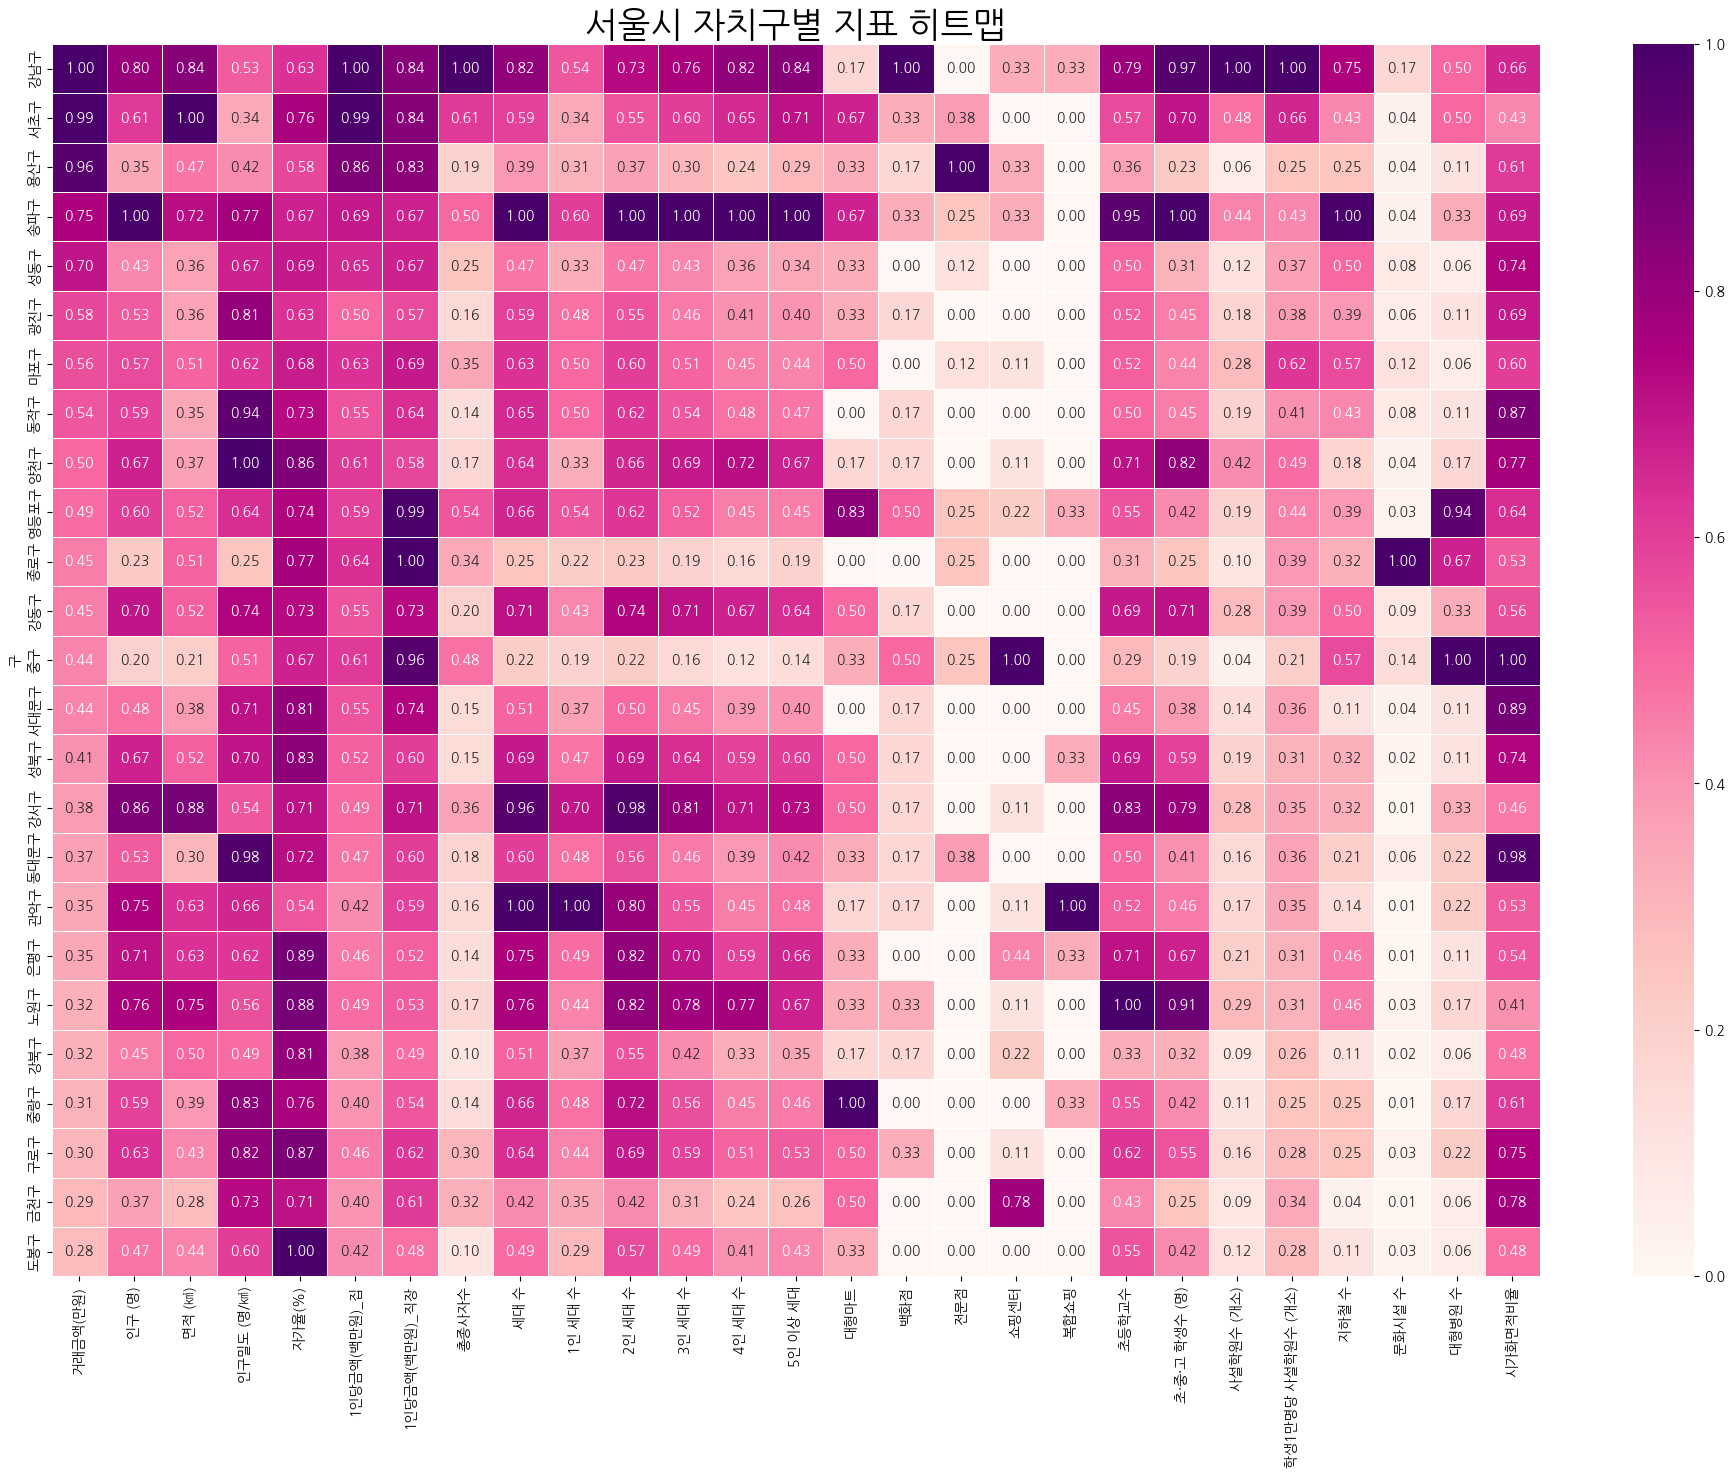

In [129]:
pop_reg_heat = pop_reg.sort_values(by="거래금액(만원)", ascending=False)

plt.figure(figsize=(24,16))
sns.heatmap(pop_reg_heat[pop_reg.columns], annot=True, fmt='.2f', linewidths=.5, cmap='RdPu')
plt.title('서울시 자치구별 지표 히트맵', fontsize = 25)
plt.show()

### 매매가격 지표와 다른 지표들간에 상관계수 계산

In [87]:
trade = pop_reg.corr().round(2)['거래금액(만원)']
trade_df = pd.DataFrame(data=trade).reset_index().sort_values(by='거래금액(만원)', ascending=False).set_index('index', drop=True).T
trade_df

index,거래금액(만원),1인당금액(백만원)_집,학생1만명당 사설학원수 (개소),총종사자수,사설학원수 (개소),전문점,지하철 수,1인당금액(백만원)_직장,백화점,면적 (㎢),...,초등학교수,세대 수,대형마트,쇼핑센터,시가화면적비율,1인 세대 수,2인 세대 수,복합쇼핑,인구밀도 (명/㎢),자가율(%)
거래금액(만원),1.0,0.95,0.65,0.62,0.58,0.56,0.54,0.48,0.47,0.41,...,0.06,0.02,0.01,-0.0,-0.04,-0.09,-0.09,-0.11,-0.31,-0.49


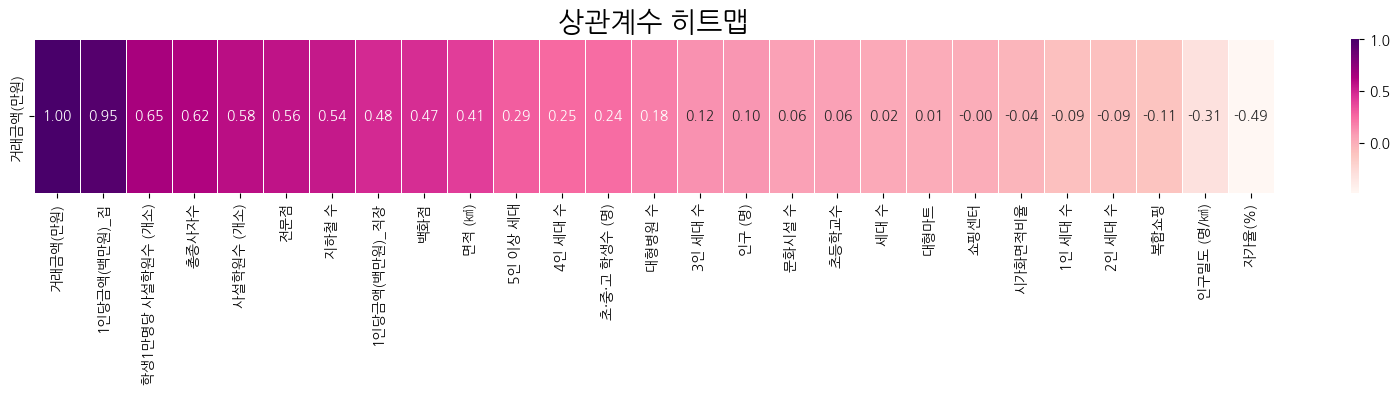

In [132]:
plt.figure(figsize=(20,2))
sns.heatmap(trade_df[trade_df.columns], annot=True, fmt='.2f', linewidths=.5, cmap='RdPu')
plt.xlabel('')
plt.title('상관계수 히트맵', fontsize = 20)
plt.show()

### 매매가격과의 상관계수를 살펴봤을 때, 주거지 기준 1인당 평균 연봉, 학생 1만명당 사설학원 수, 총 종사자수가 의미가 있을 것이라고 생각된다.

### 매매지수 변동 그래프 작성

In [89]:
rate = pd.read_excel('../data/eda_project/seoul_apart_buy.xlsx')
rate

,지역명,2014-01-20 00:00:52,2014-01-27 00:00:52,2014-02-03 00:00:52,2014-02-17 00:00:52,2014-02-24 00:00:52,2014-03-03 00:00:52,2014-03-10 00:00:52,2014-03-17 00:00:52,2014-03-24 00:00:52,...,2021-10-25 00:00:52,2021-11-01 00:00:52,2021-11-08 00:00:52,2021-11-15 00:00:52,2021-11-22 00:00:52,2021-11-29 00:00:52,2021-12-06 00:00:52,2021-12-13 00:00:52,2021-12-20 00:00:52,2021-12-27 00:00:52
0,전국,66.724,66.767,66.813,66.868,66.927,66.993,67.048,67.097,67.137,...,98.315,98.599,98.849,99.065,99.256,99.414,99.560,99.685,99.806,99.893
1,서울,55.449,55.478,55.504,55.533,55.572,55.608,55.634,55.655,55.670,...,98.751,98.969,99.156,99.310,99.458,99.595,99.700,99.768,99.850,99.917
2,종로구,70.517,70.517,70.517,70.517,70.517,70.517,70.517,70.529,70.529,...,98.729,99.136,99.186,99.186,99.358,99.616,99.882,99.968,100.000,100.000
3,중구,64.817,64.873,64.943,64.967,64.968,64.968,64.968,64.983,64.983,...,99.096,99.318,99.318,99.470,99.578,99.596,99.741,99.918,99.918,99.968
4,용산구,59.314,59.297,59.293,59.287,59.271,59.263,59.242,59.223,59.201,...,97.830,98.213,98.456,98.750,99.202,99.420,99.499,99.639,99.891,99.922
5,성동구,57.385,57.379,57.358,57.362,57.415,57.415,57.415,57.419,57.457,...,99.355,99.364,99.513,99.631,99.674,99.674,99.717,99.729,99.741,99.770
6,광진구,58.137,58.148,58.148,58.170,58.222,58.273,58.401,58.401,58.401,...,98.893,99.212,99.333,99.476,99.586,99.723,99.803,99.834,99.921,99.927
7,동대문구,58.642,58.663,58.683,58.704,58.736,58.781,58.808,58.898,58.941,...,99.040,99.072,99.445,99.737,99.772,99.782,99.782,99.782,99.845,99.936
8,중랑구,62.369,62.369,62.384,62.399,62.409,62.423,62.423,62.457,62.475,...,98.760,99.007,99.366,99.366,99.576,99.824,99.883,99.918,99.930,99.981
9,성북구,55.841,55.955,55.964,55.985,56.004,56.048,56.100,56.170,56.181,...,99.431,99.480,99.549,99.814,99.837,99.886,99.897,99.897,99.980,100.000


In [90]:
import pandas as pd
import plotly.express as px

index_data2 = pd.read_excel('../data/eda_project/seoul_apart_buy.xlsx')
index_data2.set_index("지역명", drop=True, inplace=True)
newname = []
oldname = index_data2.columns
for i in oldname:
    if type(i) == type("str"):
        newname.append(i.split(" ")[0])
    else:
        newname.append(i.strftime("%Y-%m-%d"))
index_data2.columns = newname

fig = px.line(index_data2.transpose(), x=index_data2.transpose().index, y=index_data2.transpose().columns,
              labels={'index': 'Date', 'value': 'Value'}, line_shape='linear')

fig.update_traces(hovertemplate='%{x}<br>Value: %{y}')

fig.show()


### 매매자수 변동 그래프를 살펴보면 노원구가 가장 많이 변화했고, 종로구가 가장 적게 변화한 걸 알 수 있다. 
### 그리고 전체적으로 18년 8월, 20년 6월을 기점으로 급등한 걸 알 수 있다.

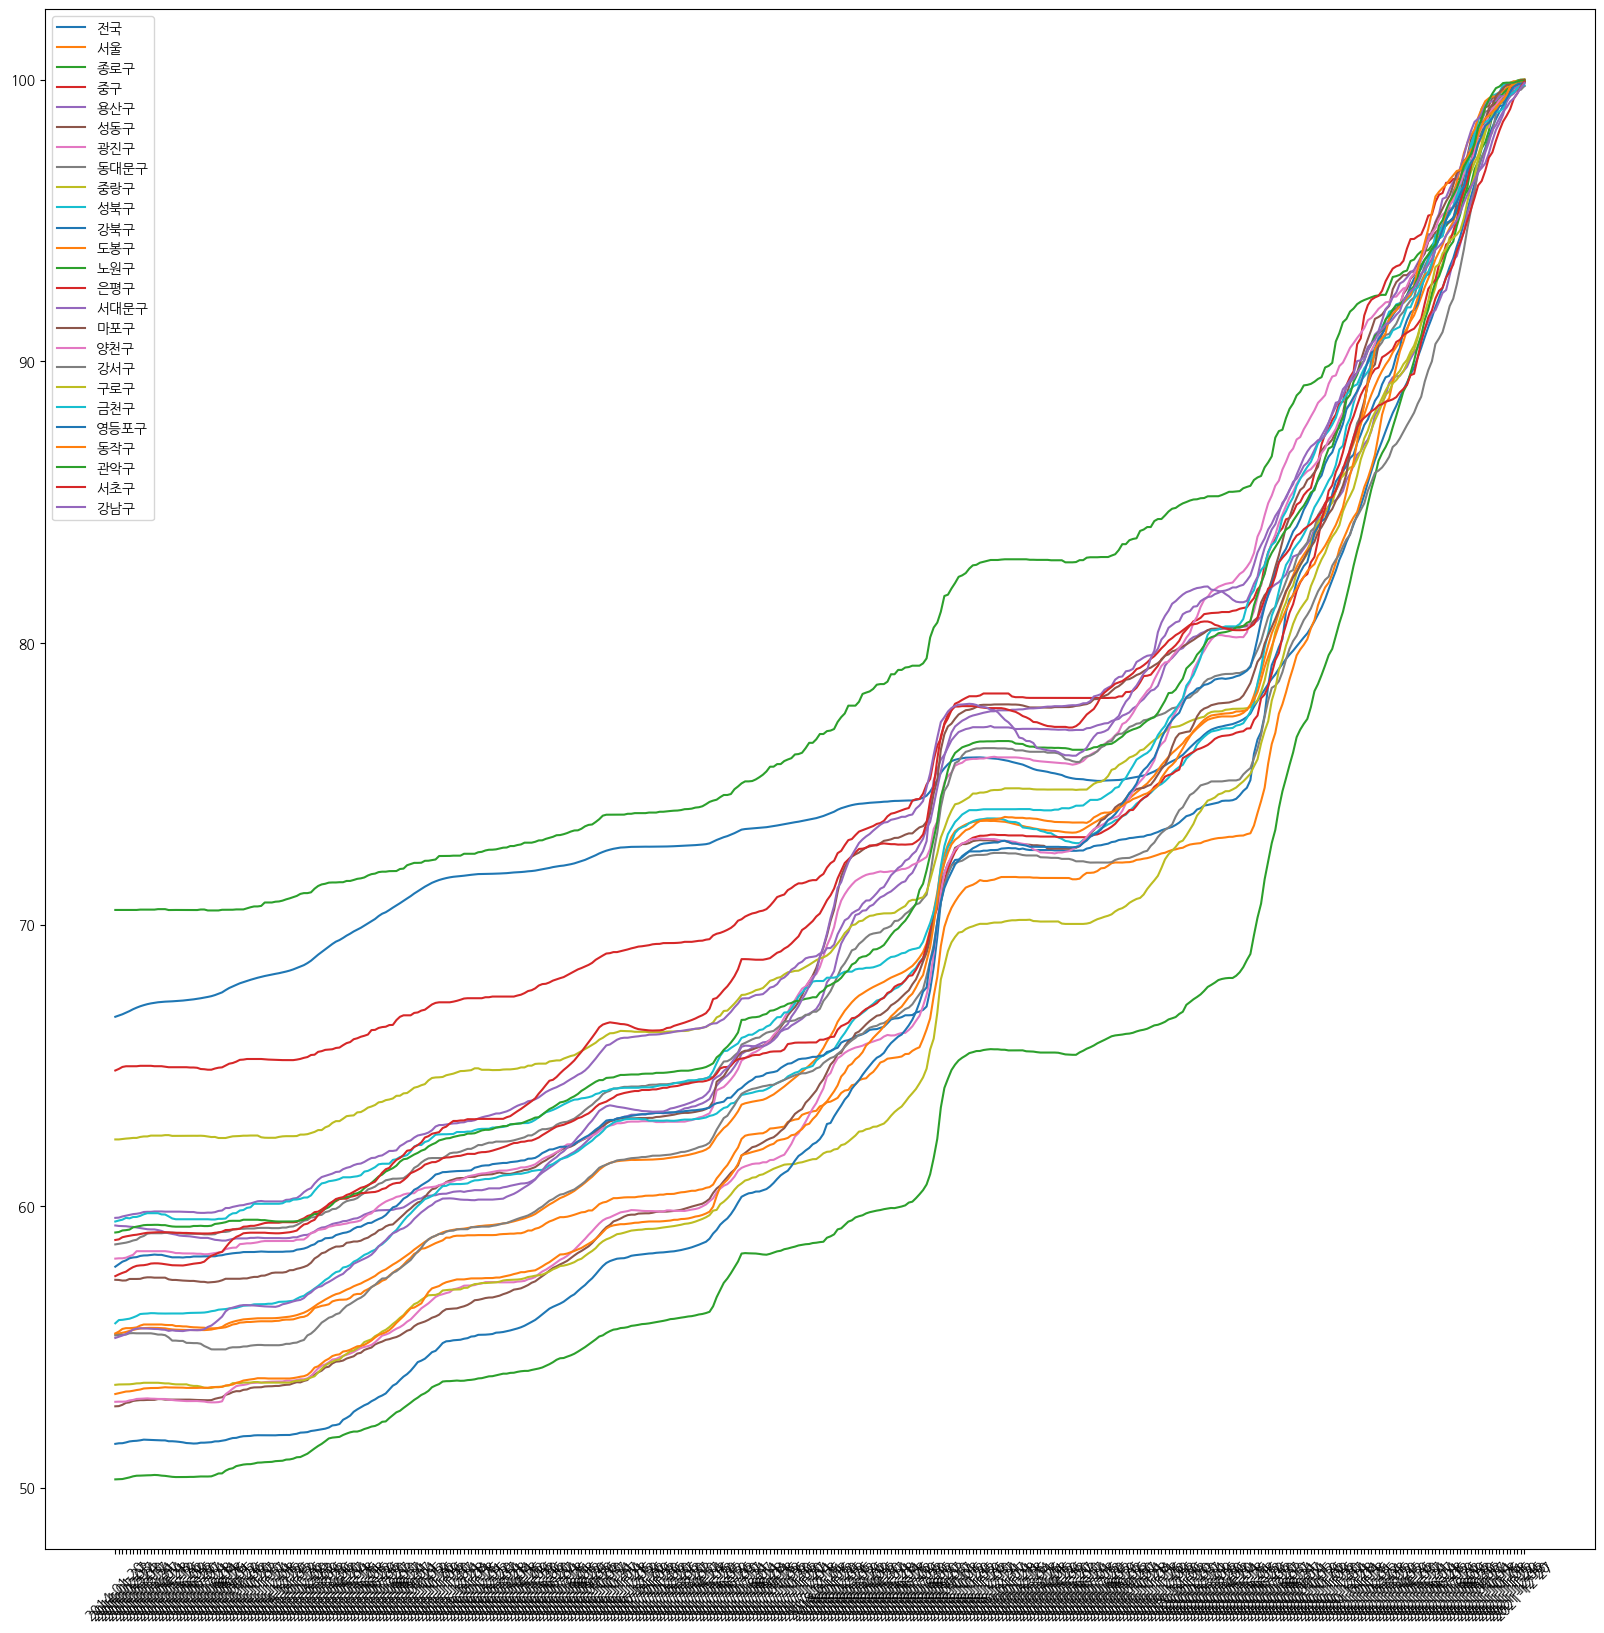

In [91]:
index_data2 = pd.read_excel('../data/eda_project/seoul_apart_buy.xlsx')
index_data2.set_index("지역명",drop=True,inplace=True)
newname = []
oldname = index_data2.columns
for i in oldname:
    if (type(i) == type("str")):
        newname.append(i.split(" ")[0])
    else:
        newname.append(i.strftime("%Y-%m-%d"))
index_data2.columns = newname
plt.figure(figsize=(20,20))
for i in range(0,25):
    plt.plot(index_data2.iloc[i])
plt.legend(index_data2.index)
plt.xticks(rotation=45)
plt.show()

### 매매수급동향 그래프 작성

In [92]:
supply = pd.read_csv('../data/eda_project/한국부동산원_전국주택가격동향조사_월간동향_아파트_매매수급동향_20220831.csv', encoding='euc-kr')
supply = supply.loc[[7]].set_index(['지역'], drop=True)
supply

,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,...,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08
지역,,,,,,,,,,,,,,,,,,,,,
서울,68.413856,70.601641,69.963537,68.960802,72.743847,71.376481,70.191431,71.376481,72.992701,81.209899,...,98.63514,92.820069,88.985006,86.860823,89.081123,90.811226,90.14802,87.312572,84.957709,82.189542


In [93]:
import pandas as pd
import plotly.express as px

supply = pd.read_csv('../data/eda_project/한국부동산원_전국주택가격동향조사_월간동향_아파트_매매수급동향_20220831.csv', encoding='euc-kr')
supply = supply.loc[[7]].set_index(['지역'], drop=True)
newname = []
oldname = supply.columns
for i in oldname:
    if type(i) == type("str"):
        newname.append(i.split(" ")[0])
    else:
        newname.append(i.strftime("%Y-%m-%d"))
supply.columns = newname

fig = px.line(supply.transpose(), x=supply.transpose().index, y=supply.transpose().columns,
              labels={'index': 'Date', 'value': 'Value'}, line_shape='linear')

fig.update_traces(hovertemplate='%{x}<br>Value: %{y}')

fig.show()


### 18년 6월부터 공급 대비 수요가 점점 상승하면서 9월 부터 급락한다. 이는 매매지수 그래프에서 18년도 급등 후 유지 현상과 연관이 있어보인다. 

### 연도별 종로구, 노원구 평균 연봉 변화 그래프 작성

In [94]:
work2= pd.read_csv("../data/eda_project/16_21_work.csv" ,  encoding='cp949')
work_year = pd.pivot_table(data=work2, index=work2.columns[0], values=work2.columns[1:])

In [95]:
work_year_plot = work_year.loc[['종로구', '노원구']]
work_year_plot

,2016,2017,2018,2019,2020,2021
구,,,,,,
종로구,44.569364,46.591874,47.627325,48.704777,49.051739,52.233029
노원구,34.260485,35.557192,36.689581,37.681806,38.424518,40.073375


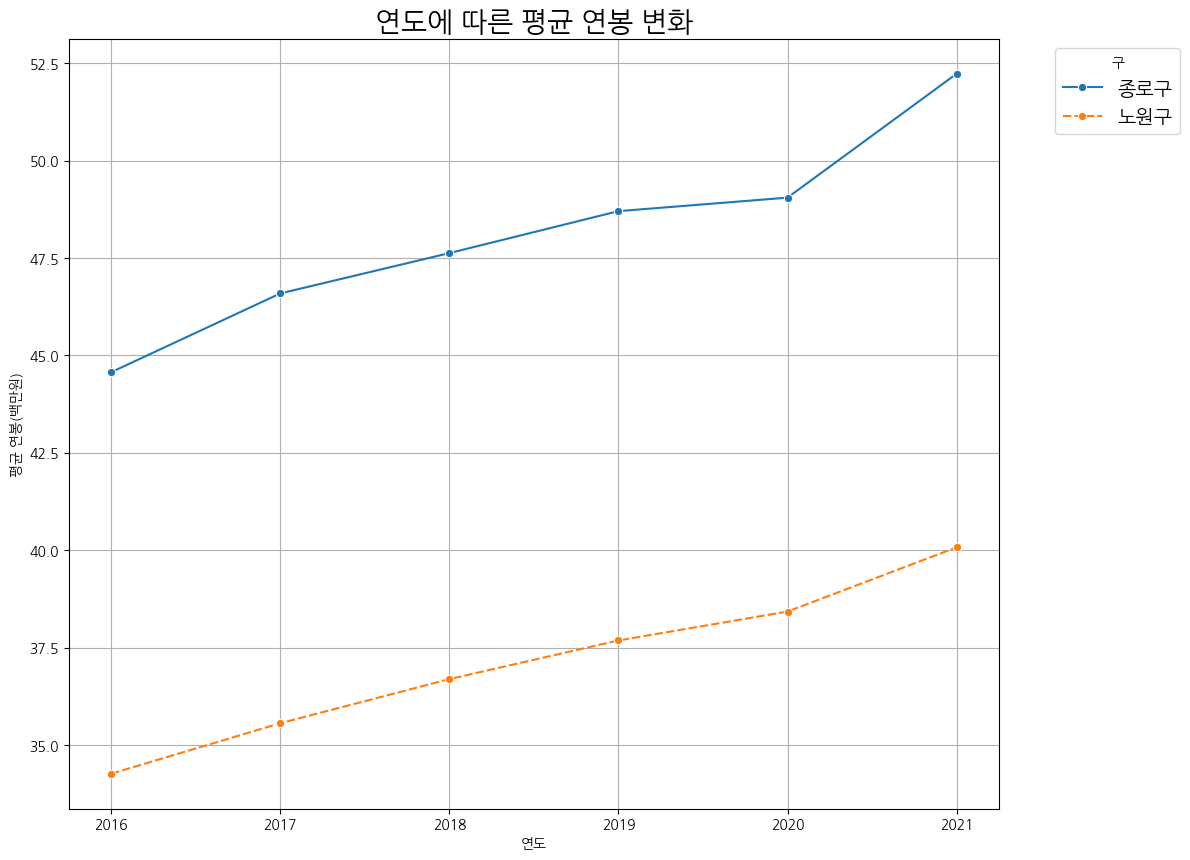

In [114]:
plt.figure(figsize=(12, 10))
sns.lineplot(data=work_year_plot.T, marker='o')
plt.title('연도에 따른 평균 연봉 변화', fontsize = 20)
plt.xlabel('연도')
plt.ylabel('평균 연봉(백만원)')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 14)

ax = plt.gca()
ax.grid(True)

plt.show()

### 주거지 기준 평균 연봉은 증가폭이 비슷해 매매지수 변동 그래프와 연관 짓지 못할 것 같다.

### 연도별 종로구, 노원구 학생 1만명 당 학원 수, 학원 수 그래프 작성

In [97]:
ei_per_st = pd.read_excel('../data/eda_project/학생+1만명당+사설학원수_20240121212053.xlsx')
ei_per_st

/home/hj/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,자치구별(1),자치구별(2),2007,2007.1,2007.2,2008,2008.1,2008.2,2009,2009.1,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,자치구별(1),자치구별(2),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),...,학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소)
1,합계,종로구,30160,136,45.1,29796,260,87.3,29302,255,...,149.2,16452,243,147.7,15912,217,136.4,15187,248,163.3
2,NaN,중구,25628,80,31.2,24892,145,58.3,23835,143,...,83.6,13566,109,80.3,12798,91,71.1,11987,108,90.1
3,NaN,용산구,28793,88,30.6,28742,160,55.7,27663,159,...,92,15852,154,97.1,15116,137,90.6,14270,151,105.8
4,NaN,성동구,38237,279,73,36295,286,78.8,34517,279,...,132.9,20447,289,141.3,19454,290,149.1,18871,294,155.8
5,NaN,광진구,53726,398,74.1,52329,418,79.9,49430,414,...,135.5,28972,405,139.8,28422,426,149.9,27738,441,159
6,NaN,동대문구,47651,350,73.5,46307,338,73,44141,337,...,133.8,26533,350,131.9,25982,359,138.2,25443,388,152.5
7,NaN,중랑구,54882,356,64.9,52579,363,69,50075,373,...,96.5,27353,262,95.8,26418,257,97.3,25922,271,104.5
8,NaN,성북구,59684,392,65.7,59126,414,70,58017,448,...,114.3,37884,439,115.9,37151,451,121.4,36247,469,129.4
9,NaN,강북구,38571,226,58.6,36809,246,66.8,35552,265,...,94.4,21398,206,96.3,20697,210,101.5,19829,217,109.4


In [98]:
ei_per_st_2= ei_per_st[['자치구별(2)', '2011.2', '2012.2','2013.2', '2014.2','2015.2', '2016.2','2017.2', '2018.2','2019.2', '2020.2','2021.2']]
ei_per_st_2 = ei_per_st_2.set_index('자치구별(2)', drop=True)
ei_per_st_2_plot = ei_per_st_2[1:]
ei_per = ei_per_st_2_plot.loc[['종로구', '노원구']]
ei_per

,2011.2,2012.2,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2
자치구별(2),,,,,,,,,,,
종로구,110,107.5,112.9,115.2,115.1,130.7,150.3,148.4,149.2,147.7,136.4
노원구,46.6,69.1,66.7,93.5,96.6,104.1,107.4,110,115.8,117.6,115.9


In [99]:
ei_per.index.name = '구'
ei_per.columns.name = '연도'
ei_per.rename(columns={'2011.2' : '2011', '2012.2' : '2012', '2013.2' : '2013', '2014.2' : '2014', 
                       '2015.2' : '2015', '2016.2' : '2016', '2017.2' : '2017', '2018.2' : '2018', 
                       '2019.2' : '2019', '2020.2' : '2020', '2021.2' : '2021'}, inplace=True)


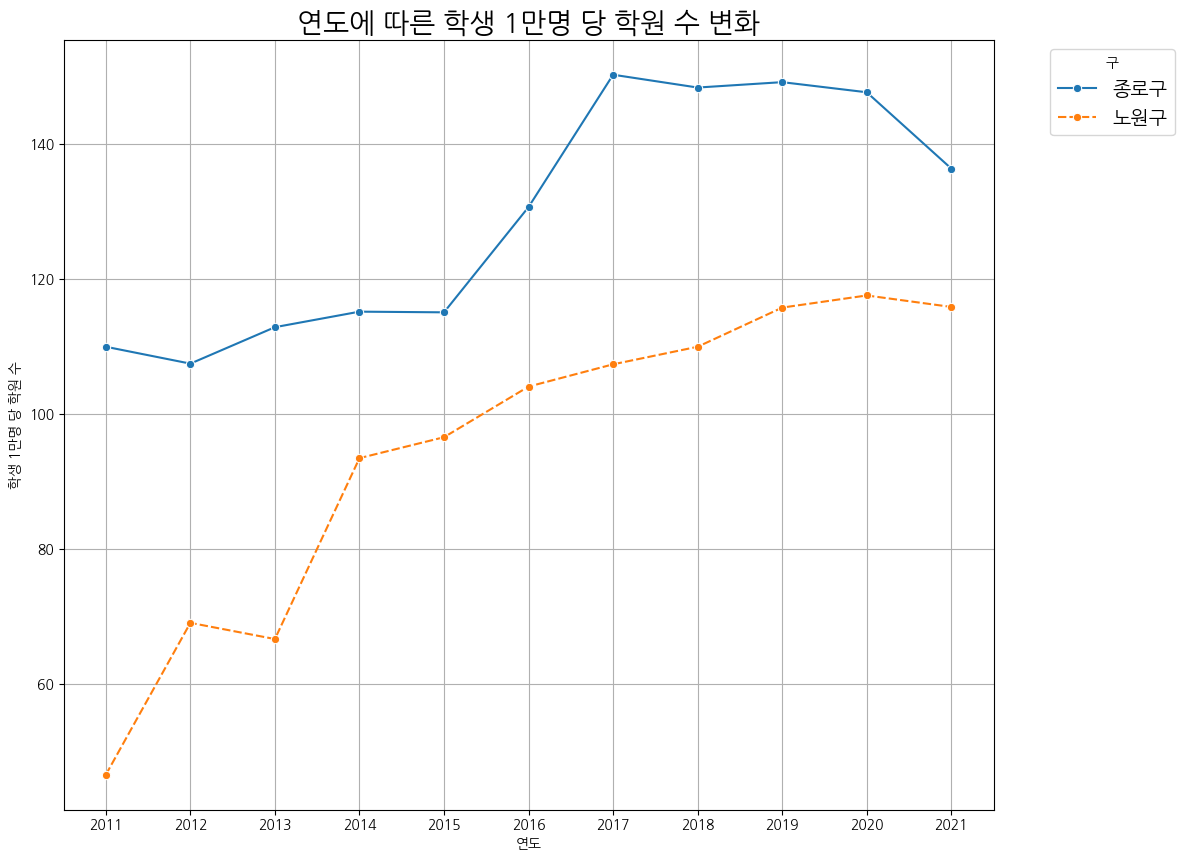

In [115]:
plt.figure(figsize=(12, 10))
sns.lineplot(data=ei_per.T, marker='o')
plt.title('연도에 따른 학생 1만명 당 학원 수 변화', fontsize = 20)
plt.xlabel('연도')
plt.ylabel('학생 1만명 당 학원 수')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 14)
ax = plt.gca()
ax.grid(True)
plt.show()

### 학생 1만명당 학원수 그래프에서 노원구의 증가폭은 종로구에 비해 매우 큰 걸로 보인다. 이는 매매지수 변동 그래프와 연관을 지을 수 있을 것 같다.
### 하지만 같이 생각해 봐야할 부분이 있다.

In [101]:

ei_per_st[['자치구별(2)', '2011.1', '2012.1','2013.1', '2014.1','2015.1', '2016.1','2017.1', '2018.1','2019.1', '2020.1','2021.1']]

,자치구별(2),2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
0,자치구별(2),사설학원수 (개소),사설학원수 (개소),사설학원수 (개소),사설학원수 (개소),사설학원수 (개소),사설학원수 (개소),사설학원수 (개소),사설학원수 (개소),사설학원수 (개소),사설학원수 (개소),사설학원수 (개소)
1,종로구,299,278,280,273,261,278,297,274,259,243,217
2,중구,144,142,135,129,126,127,128,119,118,109,91
3,용산구,161,166,166,162,163,165,175,158,155,154,137
4,성동구,287,274,262,262,275,279,295,314,293,289,290
5,광진구,427,450,420,438,446,429,442,430,406,405,426
6,동대문구,352,315,331,328,349,355,360,363,368,350,359
7,중랑구,354,330,321,198,297,306,288,273,276,262,257
8,성북구,449,484,466,455,433,453,457,464,450,439,451
9,강북구,254,254,248,234,227,233,227,218,209,206,210


In [102]:
ei_per_1= ei_per_st[['자치구별(2)', '2011.1', '2012.1','2013.1', '2014.1','2015.1', '2016.1','2017.1', '2018.1','2019.1', '2020.1','2021.1']]
ei_per_1 = ei_per_1.set_index('자치구별(2)', drop=True)
ei_per_1_plot = ei_per_1[1:]
ei_per_1 = ei_per_1_plot.loc[['종로구', '노원구']]
ei_per_1

,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
자치구별(2),,,,,,,,,,,
종로구,299,278,280,273,261,278,297,274,259,243,217
노원구,456,645,593,791,780,794,775,747,740,718,684


In [103]:
ei_per_1.index.name = '구'
ei_per_1.columns.name = '연도'
ei_per_1.rename(columns={'2011.1' : '2011', '2012.1' : '2012', '2013.1' : '2013', '2014.1' : '2014', 
                       '2015.1' : '2015', '2016.1' : '2016', '2017.1' : '2017', '2018.1' : '2018', 
                       '2019.1' : '2019', '2020.1' : '2020', '2021.1' : '2021'}, inplace=True)


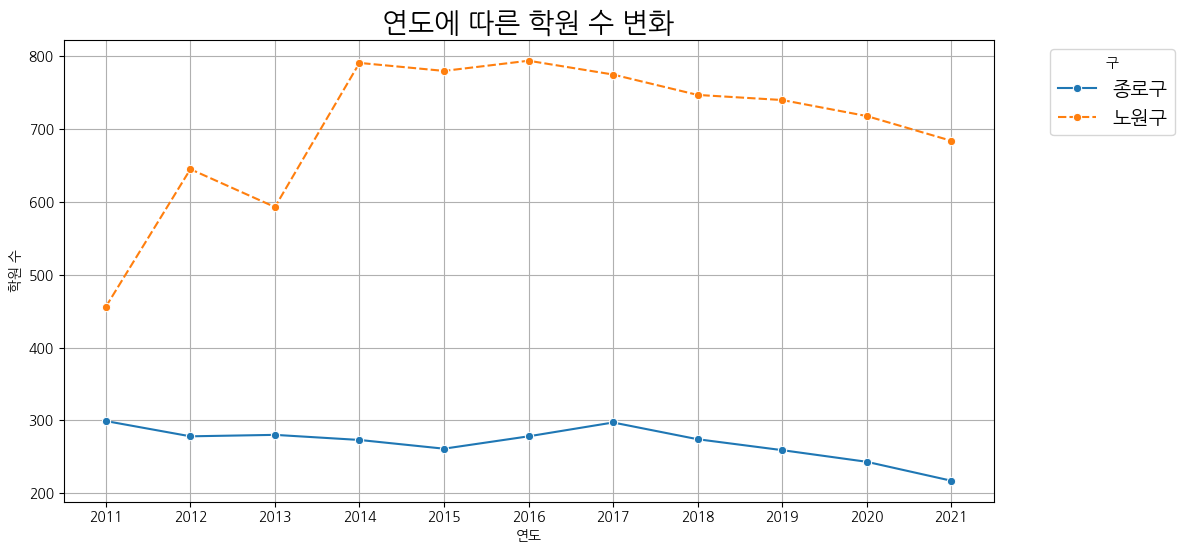

In [116]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ei_per_1.T, marker='o')
plt.title('연도에 따른 학원 수 변화', fontsize = 20)
plt.xlabel('연도')
plt.ylabel('학원 수')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 14)
ax = plt.gca()
ax.grid(True)
plt.show()


In [105]:
ei_per_2= ei_per_st[['자치구별(2)', '2011', '2012','2013', '2014','2015', '2016','2017', '2018','2019', '2020','2021']]
ei_per_2 = ei_per_2.set_index('자치구별(2)', drop=True)
ei_per_2_plot = ei_per_2[1:]
ei_per_2 = ei_per_2_plot.loc[['종로구', '노원구']]
ei_per_2

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
자치구별(2),,,,,,,,,,,
종로구,27180,25871,24799,23702,22672,21270,19758,18468,17363,16452,15912
노원구,97838,93356,88862,84636,80782,76307,72169,67933,63924,61078,59041


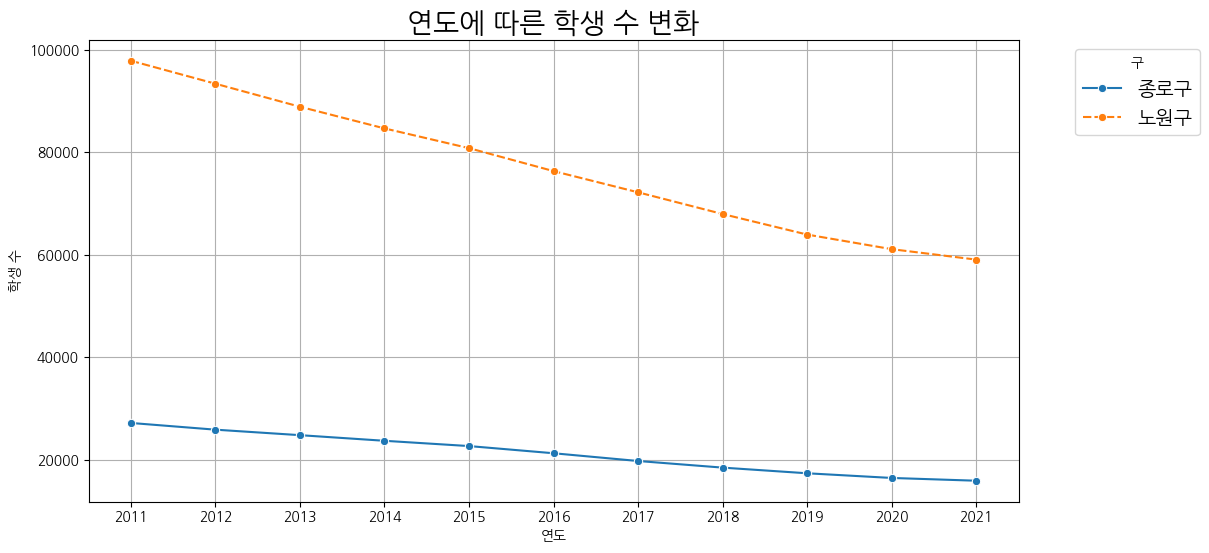

In [117]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ei_per_2.T, marker='o')
plt.title('연도에 따른 학생 수 변화', fontsize = 20)
plt.xlabel('연도')
plt.ylabel('학생 수')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 14)
ax = plt.gca()
ax.grid(True)
plt.show()


### 학생 1만명 당 학원 수가 늘고있지만 학원과 학생 수는 동시에 줄어들고 있고 노원구의 학생 수는 종로구보다 빠르게 줄어글고 있음을 간과해선 안된다.

In [107]:
worker= pd.read_excel("../data/eda_project/사업체현황+종사자수(종사상지위별_성별_동별)_20240122173159.xlsx")

worker_0= worker[['동별(2)', '2011', '2012','2013', '2014','2015', '2016','2017', '2018','2019', '2020','2021']]
worker_0 = worker_0.set_index('동별(2)', drop=True)
worker_0_plot = worker_0[1:]
worker_0_plot = worker_0_plot.loc[['종로구', '노원구']]
worker_0_plot

/home/hj/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
동별(2),,,,,,,,,,,
종로구,38635,39486,39326,40923,40871,40664,40490,39952,39679,50531,48361
노원구,25636,24864,25173,26081,25827,26271,26516,26616,26618,37442,37909


### 연도별 종로구, 노원구 사업체 수, 총 종사자 수 변화

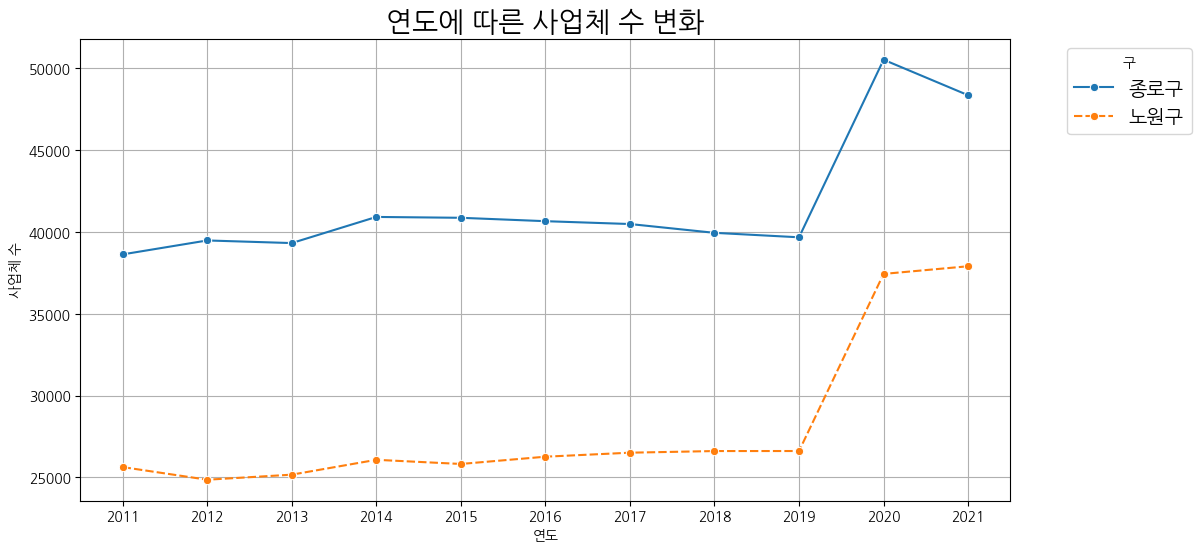

In [122]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=worker_0_plot.T, marker='o')
plt.title('연도에 따른 사업체 수 변화', fontsize = 20)
plt.xlabel('연도')
plt.ylabel('사업체 수')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 14)
ax = plt.gca()
ax.grid(True)
plt.show()

In [119]:
worker_1= worker[['동별(2)', '2011.1', '2012.1','2013.1', '2014.1','2015.1', '2016.1','2017.1', '2018.1','2019.1', '2020.1','2021.1']]
worker_1 = worker_1.set_index('동별(2)', drop=True)
worker_1_plot = worker_1[1:]
worker_1_plot = worker_1_plot.loc[['종로구', '노원구']]
worker_1_plot

,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
동별(2),,,,,,,,,,,
종로구,232685,232857,235681,245698,269106,268309,268702,265017,260446,284570,275063
노원구,103761,102327,104525,109272,114736,114999,117859,118713,116684,127454,133398


In [120]:
worker_1_plot.index.name = '구'
worker_1_plot.columns.name = '연도'
worker_1_plot.rename(columns={'2011.1' : '2011', '2012.1' : '2012', '2013.1' : '2013', '2014.1' : '2014', 
                       '2015.1' : '2015', '2016.1' : '2016', '2017.1' : '2017', '2018.1' : '2018', 
                       '2019.1' : '2019', '2020.1' : '2020', '2021.1' : '2021'}, inplace=True)


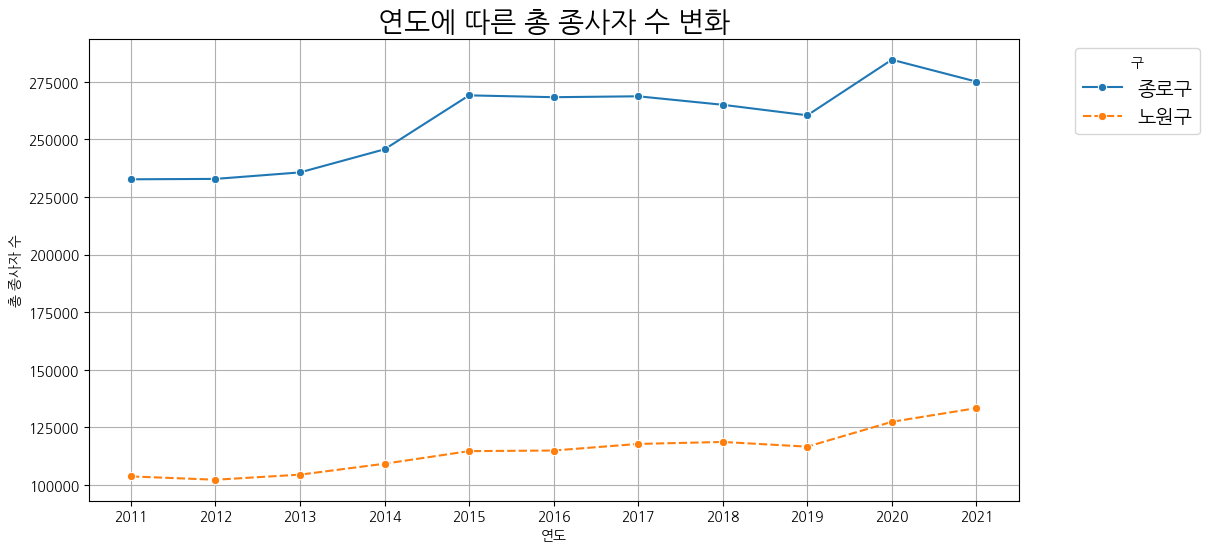

In [123]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=worker_1_plot.T, marker='o')
plt.title('연도에 따른 총 종사자 수 변화', fontsize = 20)
plt.xlabel('연도')
plt.ylabel('총 종사자 수')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 14)
ax = plt.gca()
ax.grid(True)
plt.show()

### 사업체 수와 총 종사자 수 또한 매매지수 변동과는 연관지을 수 없을 것 같다.
### 그럼 매매지수 변동에 영향을 줄 수 있는 요인은 무엇인가.

## 출처
### 서울교통공사 지하철역 주소 및 전화번호 정보 https://data.seoul.go.kr/dataList/OA-12035/S/1/datasetView.do
### 서울시 문화시설 현황 https://data.seoul.go.kr/dataList/OA-12993/S/1/datasetView.do
### 서울시 사설학원 통계 https://data.seoul.go.kr/dataList/195/S/2/datasetView.do
### 서울시 유통업체현황 (동별) 통계 https://data.seoul.go.kr/dataList/10128/S/2/datasetView.do
### 서울시 의료기관 (구별) 통계 https://data.seoul.go.kr/dataList/173/S/2/datasetView.do
### 서울시 시가화면적 통계 https://data.seoul.go.kr/dataList/569/S/2/datasetView.do
### 서울시 세대원수별 세대수(구별) 통계 https://data.seoul.go.kr/dataList/10930/S/2/datasetView.do
### 서울시 인구밀도 (구별) 통계 https://data.seoul.go.kr/dataList/10790/S/2/datasetView.do
 